<h1> Mong Kok, Hong Kong

<h3> Import Libaries

In [3]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Libraries imported.


<h3> Find the Latitude and Longitude with Geolocator

In [5]:
address = 'Mong Kok, Hong Kong'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mong Kok, Hong Kong are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mong Kok, Hong Kong are 22.3197491, 114.1693644.


<h3> Foursquare API Setup

In [6]:
CLIENT_ID = 'PCFDGFQ0VPV42M3Z54VCJY311VEWMCLD5REIFFK12I4XRL5S' # your Foursquare ID
CLIENT_SECRET = 'AEDMISDK4JLSKTO05AUBRZLB1DEUDLLOUB5VDTPPDPMIRN0G' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PCFDGFQ0VPV42M3Z54VCJY311VEWMCLD5REIFFK12I4XRL5S
CLIENT_SECRET:AEDMISDK4JLSKTO05AUBRZLB1DEUDLLOUB5VDTPPDPMIRN0G


<h3> Setup the URL for fetching data from API

In [7]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 2638 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PCFDGFQ0VPV42M3Z54VCJY311VEWMCLD5REIFFK12I4XRL5S&client_secret=AEDMISDK4JLSKTO05AUBRZLB1DEUDLLOUB5VDTPPDPMIRN0G&v=20180605&ll=22.3197491,114.1693644&radius=2638&limit=200'

<h3>Fetch Data using the URL

In [8]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eecd9729388d7001b0b90f4'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Hong Kong',
  'headerFullLocation': 'Hong Kong',
  'headerLocationGranularity': 'city',
  'totalResults': 239,
  'suggestedBounds': {'ne': {'lat': 22.343491123742023,
    'lng': 114.1949813451474},
   'sw': {'lat': 22.296007076257975, 'lng': 114.14374745485262}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b0588ccf964a5207eda22e3',
       'name': 'Cordis, Hong Kong (香港康得思酒店)',
       'location': {'address': '555 Shanghai Street, Mongkok',
        'lat': 22.318175,
        'lng': 114.168112,
        'labeledLatLngs': [{'label': 'display',
          'lat': 22.318175,


<h3> Turn the returned JSON file into Python Dataframe

In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,"Cordis, Hong Kong (香港康得思酒店)",4b0588ccf964a5207eda22e3,Hotel,22.318175,114.168112
1,T. A. P. - The Ale Project,54819bb2498e42756eb3fe49,Beer Bar,22.317495,114.172610
2,Kam Wah Café (金華冰廳),4bb85b883db7b7133340219a,Cha Chaan Teng,22.322275,114.169755
3,Green Common The FOREST,59a28fa993bd63511b9cd8cd,Vegetarian / Vegan Restaurant,22.319138,114.171755
4,Chuan Spa (「川」水療中心),4bb5dd2aef159c74c01a75f7,Spa,22.318213,114.168099
5,Black Sugar Coffee,56dbd932498edb85546c912f,Coffee Shop,22.319294,114.173588
6,White Noise Records,4c672bd2d3899c7464a5002a,Record Shop,22.322509,114.167452
7,Ming Court (明閣),4bbffe322a89ef3bb107f088,Cantonese Restaurant,22.318420,114.168253
8,Superman Toys,4b7facf6f964a5200b3930e3,Toy / Game Store,22.315544,114.170679
9,Paradise Dynasty (樂天皇朝),57565aec498e7fd15d42360e,Dumpling Restaurant,22.317951,114.169586


In [11]:
format(len(nearby_venues['venue.categories'].unique()))

'50'

<h3> The Unique Categories of Mong Kok

In [12]:
nearby_venues['venue.categories'].unique()

array(['Hotel', 'Beer Bar', 'Cha Chaan Teng',
       'Vegetarian / Vegan Restaurant', 'Spa', 'Coffee Shop',
       'Record Shop', 'Cantonese Restaurant', 'Toy / Game Store',
       'Dumpling Restaurant', 'Sporting Goods Shop', 'Market',
       'Food & Drink Shop', 'Malay Restaurant', 'Multiplex', 'Café',
       'Dim Sum Restaurant', 'Bubble Tea Shop', 'Juice Bar',
       'Clothing Store', 'Thai Restaurant', 'Snack Place', 'Gastropub',
       'Bakery', 'BBQ Joint', 'Ramen Restaurant', 'Noodle House',
       'Shopping Mall', 'Stationery Store', 'Hong Kong Restaurant',
       'Steakhouse', 'Flower Shop', 'Hotpot Restaurant', 'Hostel',
       'Hotel Bar', 'Japanese Restaurant', 'Cosmetics Shop',
       'Supermarket', 'Shaanxi Restaurant', 'Farmers Market',
       'Dessert Shop', 'Vietnamese Restaurant', 'Chinese Restaurant',
       'Bar', 'Indian Restaurant', 'Hobby Shop', 'Art Gallery',
       'Scenic Lookout', 'Plaza', 'Sushi Restaurant'], dtype=object)

In [14]:
venue_id_list = nearby_venues['venue.id'].tolist()
venue_id_list

['4b0588ccf964a5207eda22e3',
 '54819bb2498e42756eb3fe49',
 '4bb85b883db7b7133340219a',
 '59a28fa993bd63511b9cd8cd',
 '4bb5dd2aef159c74c01a75f7',
 '56dbd932498edb85546c912f',
 '4c672bd2d3899c7464a5002a',
 '4bbffe322a89ef3bb107f088',
 '4b7facf6f964a5200b3930e3',
 '57565aec498e7fd15d42360e',
 '53e60f19498e457cc2d6623b',
 '4b0588daf964a52039dd22e3',
 '56362d97498e8f8d6ccf5510',
 '5610a28f498ed34f7a1c5aab',
 '525539b1498eabff557837d3',
 '4ca83379b0b8236a366fb1e6',
 '4b3989daf964a5208d5d25e3',
 '54cdd952498ea24892377e6c',
 '4be6823d2468c928e6760143',
 '5b98782ad1a402002c28b107',
 '4d401f9fc1d4721eb47d0dc7',
 '56ef88a9498e40e2af612c73',
 '598c54113149b904bb977ad6',
 '4cb15765aef16dcb480bb954',
 '522aa24d11d2a3a88ad2615d',
 '58c29af89465dd54946aac58',
 '59f01932029a55779f387106',
 '4c0f75261281c9b6688a1e1d',
 '590fad50ea1e4476bffabf1d',
 '4b58a3acf964a5200c6328e3',
 '4e8f06052c5b20a682004c38',
 '4b6e4192f964a52092b42ce3',
 '5526808f498e0e0780ecfc2d',
 '4b9cd81ef964a520637e36e3',
 '4b179faff964

In [16]:

#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[191, 182, 392, 13, 14, 49, 22, 74, 17, 21, 126, 263, 22, 18, 22, 8, 162, 42, 361, 10, 22, 13, 6, 58, 100, 8, 8, 28, 8, 11, 7, 26, 48, 6, 744, 20, 17, 216, 68, 40, 14, 6, 24, 33, 25, 15, 28, 12, 6, 24, 9, 6, 15, 15, 11, 60, 22, 86, 192, 309, 69, 213, 74, 32, 20, 83, 111, 8, 16, 16, 25, 9, 28, 5, 11, 7, 8, 7, 287, 85, 6, 24, 395, 23, 32, 9, 100, 18, 10, 32, 131, 35, 16, 15, 23, 24, 17, 53, 23, 21]


In [17]:
!pip install wordcloud

     |████████████████████████████████| 368kB 10.1MB/s eta 0:00:01


<h3> Show the WordCloud to briefly visualize the data

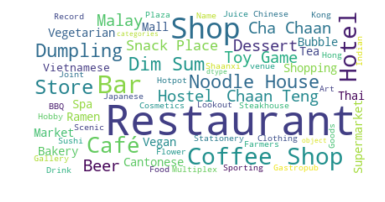

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

cat=str(nearby_venues['venue.categories'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(cat)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

,name,id,categories,lat,lng
0,"Cordis, Hong Kong (香港康得思酒店)",4b0588ccf964a5207eda22e3,Hotel,22.318175,114.168112
1,T. A. P. - The Ale Project,54819bb2498e42756eb3fe49,Beer Bar,22.317495,114.172610
2,Kam Wah Café (金華冰廳),4bb85b883db7b7133340219a,Cha Chaan Teng,22.322275,114.169755
3,Green Common The FOREST,59a28fa993bd63511b9cd8cd,Vegetarian / Vegan Restaurant,22.319138,114.171755
4,Chuan Spa (「川」水療中心),4bb5dd2aef159c74c01a75f7,Spa,22.318213,114.168099
5,Black Sugar Coffee,56dbd932498edb85546c912f,Coffee Shop,22.319294,114.173588
6,White Noise Records,4c672bd2d3899c7464a5002a,Record Shop,22.322509,114.167452
7,Ming Court (明閣),4bbffe322a89ef3bb107f088,Cantonese Restaurant,22.318420,114.168253
8,Superman Toys,4b7facf6f964a5200b3930e3,Toy / Game Store,22.315544,114.170679
9,Paradise Dynasty (樂天皇朝),57565aec498e7fd15d42360e,Dumpling Restaurant,22.317951,114.169586


<h3>Combine the Likes they get with the Main Dataframe

In [22]:
mk_venues = nearby_venues.copy()
mk_venues['likes'] = like_list
mk_venues

,name,id,categories,lat,lng,likes
0,"Cordis, Hong Kong (香港康得思酒店)",4b0588ccf964a5207eda22e3,Hotel,22.318175,114.168112,191
1,T. A. P. - The Ale Project,54819bb2498e42756eb3fe49,Beer Bar,22.317495,114.172610,182
2,Kam Wah Café (金華冰廳),4bb85b883db7b7133340219a,Cha Chaan Teng,22.322275,114.169755,392
3,Green Common The FOREST,59a28fa993bd63511b9cd8cd,Vegetarian / Vegan Restaurant,22.319138,114.171755,13
4,Chuan Spa (「川」水療中心),4bb5dd2aef159c74c01a75f7,Spa,22.318213,114.168099,14
5,Black Sugar Coffee,56dbd932498edb85546c912f,Coffee Shop,22.319294,114.173588,49
6,White Noise Records,4c672bd2d3899c7464a5002a,Record Shop,22.322509,114.167452,22
7,Ming Court (明閣),4bbffe322a89ef3bb107f088,Cantonese Restaurant,22.318420,114.168253,74
8,Superman Toys,4b7facf6f964a5200b3930e3,Toy / Game Store,22.315544,114.170679,17
9,Paradise Dynasty (樂天皇朝),57565aec498e7fd15d42360e,Dumpling Restaurant,22.317951,114.169586,21


<h3> Visualize the Location of the Restaurants with a Map

In [23]:
import folium 

map_mk = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng in zip(mk_venues['lat'], mk_venues['lng']):

    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mk)  
    
map_mk

<h3>Visualize the Like Statistics with a Histogram and Box diagram

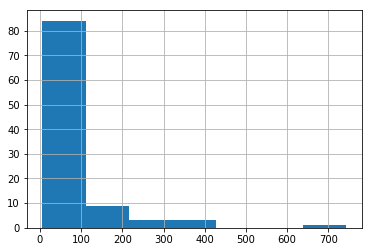

In [24]:
mk_venues['likes'].hist(bins=7)
plt.show()

In [25]:
print('Most Likes:',mk_venues['likes'].max())
print('Least Likes:',mk_venues['likes'].min())
print('Median Likes',mk_venues['likes'].median())
print('Mean Likes:',mk_venues['likes'].mean())


Most Likes: 744
Least Likes: 5
Median Likes 22.5
Mean Likes: 64.96


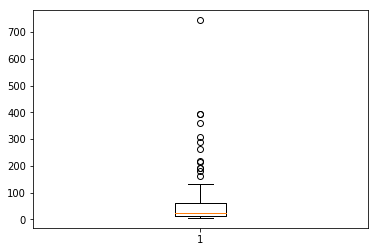

In [26]:
fig, ax = plt.subplots()
ax.boxplot(mk_venues['likes'])

plt.show()

<h3>Spilit the Venues with a Tier List wich contains 5 tiers

In [27]:
print(np.percentile(mk_venues['likes'], 20))
print(np.percentile(mk_venues['likes'], 40))
print(np.percentile(mk_venues['likes'], 60))
print(np.percentile(mk_venues['likes'], 80))

10.0
18.0
26.799999999999997
83.4


In [29]:
def conditions(s):
    if s['likes']<=10:
        return '1'
    if s['likes']<=18:
        return '2'
    if s['likes']<=26:
        return '3'
    if s['likes']<=83:
        return '4'
    if s['likes']>83:
        return '5'

mk_venues['Tier']=mk_venues.apply(conditions, axis=1)
mk_venues

,name,id,categories,lat,lng,likes,Tier
0,"Cordis, Hong Kong (香港康得思酒店)",4b0588ccf964a5207eda22e3,Hotel,22.318175,114.168112,191,5
1,T. A. P. - The Ale Project,54819bb2498e42756eb3fe49,Beer Bar,22.317495,114.172610,182,5
2,Kam Wah Café (金華冰廳),4bb85b883db7b7133340219a,Cha Chaan Teng,22.322275,114.169755,392,5
3,Green Common The FOREST,59a28fa993bd63511b9cd8cd,Vegetarian / Vegan Restaurant,22.319138,114.171755,13,2
4,Chuan Spa (「川」水療中心),4bb5dd2aef159c74c01a75f7,Spa,22.318213,114.168099,14,2
5,Black Sugar Coffee,56dbd932498edb85546c912f,Coffee Shop,22.319294,114.173588,49,4
6,White Noise Records,4c672bd2d3899c7464a5002a,Record Shop,22.322509,114.167452,22,3
7,Ming Court (明閣),4bbffe322a89ef3bb107f088,Cantonese Restaurant,22.318420,114.168253,74,4
8,Superman Toys,4b7facf6f964a5200b3930e3,Toy / Game Store,22.315544,114.170679,17,2
9,Paradise Dynasty (樂天皇朝),57565aec498e7fd15d42360e,Dumpling Restaurant,22.317951,114.169586,21,3


In [44]:
mk_ven_likes = mk_venues.sort_values(by=['likes'], ascending=False)
mk_ven_likes.head(10)

,name,id,categories,lat,lng,likes,Tier
34,Langham Place (朗豪坊),4b179faff964a520b1c623e3,Shopping Mall,22.318512,114.168516,744,5
82,"The Ritz-Carlton, Hong Kong (香港麗思卡爾頓酒店)",4c6a79b5d0bdc9b6ba80a80b,Hotel,22.303461,114.160218,395,5
2,Kam Wah Café (金華冰廳),4bb85b883db7b7133340219a,Cha Chaan Teng,22.322275,114.169755,392,5
18,One Dim Sum (一點心),4be6823d2468c928e6760143,Dim Sum Restaurant,22.325432,114.169293,361,5
59,Tim Ho Wan (添好運),4bfe9d38ac039521c6d4a880,Dim Sum Restaurant,22.328987,114.166320,309,5
78,W Hong Kong,4b1b8550f964a520d3fb23e3,Hotel,22.304938,114.160669,287,5
11,Mongkok Flower Market (旺角花墟),4b0588daf964a52039dd22e3,Market,22.324995,114.172148,263,5
37,Royal Plaza Hotel (帝京酒店),4b0588ccf964a52067da22e3,Hotel,22.324646,114.173193,216,5
61,Tim Ho Wan (添好運),5111fb77e4b00a14fe0d61ef,Dim Sum Restaurant,22.316858,114.163081,213,5
58,DimDimSum Dim Sum Specialty Store (點點心點心專門店),4cbedf6b020d468884da5e38,Dim Sum Restaurant,22.306986,114.166155,192,5


<h3> Assign New Category for Hong Kong Local Food as there are too many categories

In [78]:
mk_venues['categories'].unique()


array(['Hotel', 'Beer Bar', 'Cha Chaan Teng',
       'Vegetarian / Vegan Restaurant', 'Spa', 'Coffee Shop',
       'Record Shop', 'Cantonese Restaurant', 'Toy / Game Store',
       'Dumpling Restaurant', 'Sporting Goods Shop', 'Market',
       'Food & Drink Shop', 'Malay Restaurant', 'Multiplex', 'Café',
       'Dim Sum Restaurant', 'Bubble Tea Shop', 'Juice Bar',
       'Clothing Store', 'Thai Restaurant', 'Snack Place', 'Gastropub',
       'Bakery', 'BBQ Joint', 'Ramen Restaurant', 'Noodle House',
       'Shopping Mall', 'Stationery Store', 'Hong Kong Restaurant',
       'Steakhouse', 'Flower Shop', 'Hotpot Restaurant', 'Hostel',
       'Hotel Bar', 'Japanese Restaurant', 'Cosmetics Shop',
       'Supermarket', 'Shaanxi Restaurant', 'Farmers Market',
       'Dessert Shop', 'Vietnamese Restaurant', 'Chinese Restaurant',
       'Bar', 'Indian Restaurant', 'Hobby Shop', 'Art Gallery',
       'Scenic Lookout', 'Plaza', 'Sushi Restaurant'], dtype=object)

In [146]:
hkfood = ['Cha Chaan Teng', 'Cantonese Restaurant','Dim Sum Restaurant','Hong Kong Restaurant','Hotpot Restaurant']
drinks = ['Beer Bar', 'Hotel Bar','Juice Bar','Bubble Tea Shop','Gastropub','Bar']

def ncat(c):
     if c['categories'] in hkfood:
        return 'hkfood'
     if c['categories'] in drinks:
        return 'drinks'

     else: return c['categories']
    

mk_venues['new_cat']=mk_venues.apply(ncat, axis=1)
mk_venues

,name,id,categories,lat,lng,likes,Tier,label,new_cat
0,"Cordis, Hong Kong (香港康得思酒店)",4b0588ccf964a5207eda22e3,Hotel,22.318175,114.168112,191,5,5,Hotel
1,T. A. P. - The Ale Project,54819bb2498e42756eb3fe49,Beer Bar,22.317495,114.172610,182,5,3,drinks
2,Kam Wah Café (金華冰廳),4bb85b883db7b7133340219a,Cha Chaan Teng,22.322275,114.169755,392,5,7,hkfood
3,Green Common The FOREST,59a28fa993bd63511b9cd8cd,Vegetarian / Vegan Restaurant,22.319138,114.171755,13,2,1,Vegetarian / Vegan Restaurant
4,Chuan Spa (「川」水療中心),4bb5dd2aef159c74c01a75f7,Spa,22.318213,114.168099,14,2,1,Spa
5,Black Sugar Coffee,56dbd932498edb85546c912f,Coffee Shop,22.319294,114.173588,49,4,8,Coffee Shop
6,White Noise Records,4c672bd2d3899c7464a5002a,Record Shop,22.322509,114.167452,22,3,0,Record Shop
7,Ming Court (明閣),4bbffe322a89ef3bb107f088,Cantonese Restaurant,22.318420,114.168253,74,4,2,hkfood
8,Superman Toys,4b7facf6f964a5200b3930e3,Toy / Game Store,22.315544,114.170679,17,2,1,Toy / Game Store
9,Paradise Dynasty (樂天皇朝),57565aec498e7fd15d42360e,Dumpling Restaurant,22.317951,114.169586,21,3,0,Dumpling Restaurant


<h3>One Hot Encoding

In [131]:
mk_onehot = pd.get_dummies(mk_venues[['new_cat','Tier']], prefix="", prefix_sep="")
mk_onehot['Name'] = mk_venues['name'] 
fixed_columns = [mk_onehot.columns[-1]] + list(mk_onehot.columns[:-1])
mk_onehot = mk_onehot[fixed_columns]
mk_onehot.head()

,Name,Art Gallery,BBQ Joint,Bakery,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Cosmetics Shop,Dessert Shop,Dumpling Restaurant,Farmers Market,Flower Shop,Food & Drink Shop,Hobby Shop,Hostel,Hotel,Indian Restaurant,Japanese Restaurant,Malay Restaurant,Market,Multiplex,Noodle House,Plaza,Ramen Restaurant,Record Shop,Scenic Lookout,Shaanxi Restaurant,Shopping Mall,Snack Place,Spa,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Toy / Game Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,drinks,hkfood,1,2,3,4,5
0,"Cordis, Hong Kong (香港康得思酒店)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,T. A. P. - The Ale Project,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,Kam Wah Café (金華冰廳),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Green Common The FOREST,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,Chuan Spa (「川」水療中心),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<h3>Find the most effective cluster number with The Silhouette Coefficient

In [164]:
from sklearn import metrics
mk_clustering = mk_onehot.drop('Name', 1)


for n_cluster in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster).fit(mk_clustering)
    label = kmeans.labels_
    sil_coeff = metrics.silhouette_score(mk_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.13784926415683088
For n_clusters=3, The Silhouette Coefficient is 0.19842058771096205
For n_clusters=4, The Silhouette Coefficient is 0.2625726720065478
For n_clusters=5, The Silhouette Coefficient is 0.32280036546879187
For n_clusters=6, The Silhouette Coefficient is 0.29000516145206295
For n_clusters=7, The Silhouette Coefficient is 0.29030517914198223
For n_clusters=8, The Silhouette Coefficient is 0.27281817632401223
For n_clusters=9, The Silhouette Coefficient is 0.35359198754254445
For n_clusters=10, The Silhouette Coefficient is 0.24095927601809936
For n_clusters=11, The Silhouette Coefficient is 0.22962594268476605


The most effective cluster number is 9

In [165]:
cluster_df = mk_onehot.drop('Name', axis=1)

k_clusters = 9

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=2).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([5, 3, 7, 1, 1, 8, 0, 2, 1, 0, 3, 3, 0, 1, 0, 4, 3, 2, 7, 6, 0, 1,
       4, 2, 3, 6, 4, 2, 4, 1, 4, 0, 2, 4, 3, 0, 1, 5, 8, 2, 1, 6, 0, 2,
       0, 1, 8, 1, 6, 0, 4, 4, 1, 1, 1, 2, 0, 3, 7, 7, 2, 7, 2, 2, 0, 2,
       3, 4, 1, 1, 0, 4, 2, 4, 1, 4, 4, 6, 5, 3, 6, 0, 5, 0, 2, 6, 3, 1,
       4, 2, 3, 2, 1, 1, 0, 0, 1, 2, 0, 0], dtype=int32)

In [167]:
mk_venues['label'] = kmeans.labels_
mk_venues.head()

,name,id,categories,lat,lng,likes,Tier,label,new_cat
0,"Cordis, Hong Kong (香港康得思酒店)",4b0588ccf964a5207eda22e3,Hotel,22.318175,114.168112,191,5,5,Hotel
1,T. A. P. - The Ale Project,54819bb2498e42756eb3fe49,Beer Bar,22.317495,114.172610,182,5,3,drinks
2,Kam Wah Café (金華冰廳),4bb85b883db7b7133340219a,Cha Chaan Teng,22.322275,114.169755,392,5,7,hkfood
3,Green Common The FOREST,59a28fa993bd63511b9cd8cd,Vegetarian / Vegan Restaurant,22.319138,114.171755,13,2,1,Vegetarian / Vegan Restaurant
4,Chuan Spa (「川」水療中心),4bb5dd2aef159c74c01a75f7,Spa,22.318213,114.168099,14,2,1,Spa


<h3> Map Clusters

In [168]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mk_venues['lat'], mk_venues['lng'], mk_venues['name'], mk_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [169]:
mk_venues.loc[mk_venues['label']==0]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
6,White Noise Records,4c672bd2d3899c7464a5002a,Record Shop,22.322509,114.167452,22,3,0,Record Shop
9,Paradise Dynasty (樂天皇朝),57565aec498e7fd15d42360e,Dumpling Restaurant,22.317951,114.169586,21,3,0,Dumpling Restaurant
12,Woft Craft Beer,56362d97498e8f8d6ccf5510,Beer Bar,22.318109,114.173396,22,3,0,drinks
14,Hot Toys Secret Base,525539b1498eabff557837d3,Toy / Game Store,22.316059,114.170107,22,3,0,Toy / Game Store
20,King of Coconut (椰汁大王),4d401f9fc1d4721eb47d0dc7,Juice Bar,22.315529,114.171091,22,3,0,drinks
31,Pepper Lunch,4b6e4192f964a52092b42ce3,BBQ Joint,22.318600,114.168532,26,3,0,BBQ Joint
35,CN Square (中南廣場),4de62741fa764cf4bed7afb3,Stationery Store,22.312402,114.170772,20,3,0,Stationery Store
42,The Brew Job,553882c4498eb10d08ccbdd6,Coffee Shop,22.319228,114.161102,24,3,0,Coffee Shop
44,Hay Fever Floral & Gifts (花粉熱),4d6f1b330187236ab7c897ba,Flower Shop,22.325375,114.173098,25,3,0,Flower Shop
49,Lion Rock (獅子樓),5084f49d498e54db9f14eacd,Hotel Bar,22.324932,114.173606,24,3,0,drinks


In [170]:
mk_venues.loc[mk_venues['label']==1]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
3,Green Common The FOREST,59a28fa993bd63511b9cd8cd,Vegetarian / Vegan Restaurant,22.319138,114.171755,13,2,1,Vegetarian / Vegan Restaurant
4,Chuan Spa (「川」水療中心),4bb5dd2aef159c74c01a75f7,Spa,22.318213,114.168099,14,2,1,Spa
8,Superman Toys,4b7facf6f964a5200b3930e3,Toy / Game Store,22.315544,114.170679,17,2,1,Toy / Game Store
13,Marks & Spencer Food,5610a28f498ed34f7a1c5aab,Food & Drink Shop,22.318384,114.168783,18,2,1,Food & Drink Shop
21,MUJI (無印良品),56ef88a9498e40e2af612c73,Clothing Store,22.316865,114.161517,13,2,1,Clothing Store
29,Toy Hunters (玩具狂熱),4b58a3acf964a5200c6328e3,Toy / Game Store,22.315801,114.170686,11,2,1,Toy / Game Store
36,Bound by Hillywood,585e2e3a76f2ca787e6b6a8a,Coffee Shop,22.326475,114.167008,17,2,1,Coffee Shop
40,Kee Tsui Cake Shop (奇趣餅家),4f01505677c885c3370f4149,Bakery,22.321728,114.170624,14,2,1,Bakery
45,Haidilao Hotpot (海底撈火鍋),59dce4e6c666661963d72957,Hotpot Restaurant,22.314126,114.170416,15,2,1,hkfood
47,Wontonmeen,4c89f2d8e51e6dcb999664de,Hostel,22.325381,114.164403,12,2,1,Hostel


In [171]:
mk_venues.loc[mk_venues['label']==2]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
7,Ming Court (明閣),4bbffe322a89ef3bb107f088,Cantonese Restaurant,22.318420,114.168253,74,4,2,hkfood
17,Urban Coffee Roaster,54cdd952498ea24892377e6c,Café,22.325498,114.164428,42,4,2,Café
23,Fei Jie (肥姐小食店),4cb15765aef16dcb480bb954,Snack Place,22.315903,114.171858,58,4,2,Snack Place
27,Ming Yuen Restaurant (明苑粉麵茶餐廳),4c0f75261281c9b6688a1e1d,Cha Chaan Teng,22.316869,114.171582,28,4,2,hkfood
32,Isaba Taifu (漁場台風),5526808f498e0e0780ecfc2d,Ramen Restaurant,22.320562,114.171210,48,4,2,Ramen Restaurant
39,Oi Man Sang Kitchen (愛文生飯店),4fa27673e4b08536fe724bf5,Hong Kong Restaurant,22.326787,114.162321,40,4,2,hkfood
43,Tiffany Restaurant (名寶石餐廳),4b5a6cbcf964a52058c428e3,Steakhouse,22.324120,114.169842,33,4,2,Steakhouse
55,Yau Yuan Xiao Jui (有緣小敍),4d32b8975017a093a9324c9b,Shaanxi Restaurant,22.307628,114.166015,60,4,2,Shaanxi Restaurant
60,合益泰小食,4c28841697d00f47a6e53fea,Snack Place,22.330503,114.161225,69,4,2,Snack Place
62,Sun Hang Yuen (新香園（堅記）),4bc4762c4cdfc9b6ca9f9821,Cha Chaan Teng,22.329882,114.160900,74,4,2,hkfood


In [172]:
mk_venues.loc[mk_venues['label']==3]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
1,T. A. P. - The Ale Project,54819bb2498e42756eb3fe49,Beer Bar,22.317495,114.172610,182,5,3,drinks
10,Sneakers Market (波鞋街),53e60f19498e457cc2d6623b,Sporting Goods Shop,22.318673,114.171376,126,5,3,Sporting Goods Shop
11,Mongkok Flower Market (旺角花墟),4b0588daf964a52039dd22e3,Market,22.324995,114.172148,263,5,3,Market
16,Broadway Cinematheque (百老匯電影中心),4b3989daf964a5208d5d25e3,Multiplex,22.310610,114.168730,162,5,3,Multiplex
24,Craft Coffee Roaster,522aa24d11d2a3a88ad2615d,Coffee Shop,22.319160,114.162038,100,5,3,Coffee Shop
34,Langham Place (朗豪坊),4b179faff964a520b1c623e3,Shopping Mall,22.318512,114.168516,744,5,3,Shopping Mall
57,Kowloon Wholesale Fruit Market (九龍水果批發市場（果欄）),4cfcc41afeec6dcbdb194e36,Farmers Market,22.312111,114.168976,86,5,3,Farmers Market
66,Kai Kai Dessert (佳佳甜品),4b9e4aa4f964a520b1d736e3,Dessert Shop,22.306450,114.171017,111,5,3,Dessert Shop
79,Yee Shun Dairy Company (港澳義順牛奶公司),4ce8a4f8d99f721eb80cb273,Dessert Shop,22.312765,114.170730,85,5,3,Dessert Shop
86,Kubrick Café,4c5ced197f661b8db4304a1c,Café,22.310801,114.168679,100,5,3,Café


In [173]:
mk_venues.loc[mk_venues['label']==4]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
15,Sun Kwong Nam Restaurant (新廣南餐室),4ca83379b0b8236a366fb1e6,Malay Restaurant,22.319721,114.168057,8,1,4,Malay Restaurant
22,Champak Restaurant by ATUM (青花),598c54113149b904bb977ad6,Thai Restaurant,22.318889,114.171646,6,1,4,Thai Restaurant
26,My Meat Run Buddy (走肉·朋友),59f01932029a55779f387106,Vegetarian / Vegan Restaurant,22.319492,114.160799,8,1,4,Vegetarian / Vegan Restaurant
28,Baofanji (包販子),590fad50ea1e4476bffabf1d,Bakery,22.326143,114.169245,8,1,4,Bakery
30,Ju Xing Home (聚興家),4e8f06052c5b20a682004c38,Cantonese Restaurant,22.325610,114.167251,7,1,4,hkfood
33,Tam Chai Yunnan Noodles (譚仔雲南米線),4b9cd81ef964a520637e36e3,Noodle House,22.316748,114.171217,6,1,4,Noodle House
50,Yaki ANA (穴居酒屋),554de7d3498ec7eee37ed359,Japanese Restaurant,22.317502,114.162049,9,1,4,Japanese Restaurant
51,Bonjour 卓悅 (卓悅),4d876ce58de9721e2f336d51,Cosmetics Shop,22.317430,114.170257,6,1,4,Cosmetics Shop
67,Café & Meal MUJI,57a2d648498e6185b7490992,Café,22.316868,114.161398,8,1,4,Café
71,So Boring (蘇波榮),526fb52c11d25718238e85ed,Café,22.312829,114.167405,9,1,4,Café


In [174]:
mk_venues.loc[mk_venues['label']==5]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
0,"Cordis, Hong Kong (香港康得思酒店)",4b0588ccf964a5207eda22e3,Hotel,22.318175,114.168112,191,5,5,Hotel
37,Royal Plaza Hotel (帝京酒店),4b0588ccf964a52067da22e3,Hotel,22.324646,114.173193,216,5,5,Hotel
78,W Hong Kong,4b1b8550f964a520d3fb23e3,Hotel,22.304938,114.160669,287,5,5,Hotel
82,"The Ritz-Carlton, Hong Kong (香港麗思卡爾頓酒店)",4c6a79b5d0bdc9b6ba80a80b,Hotel,22.303461,114.160218,395,5,5,Hotel


In [175]:
mk_venues.loc[mk_venues['label']==6]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
19,Tiger Sugar (老虎堂黑糖專売),5b98782ad1a402002c28b107,Bubble Tea Shop,22.320348,114.169509,10,1,6,drinks
25,Cheers,58c29af89465dd54946aac58,Gastropub,22.317399,114.172635,8,1,6,drinks
41,Pazzeria,58ad7eb1a19e9053f0471593,Beer Bar,22.317608,114.172710,6,1,6,drinks
48,The Alley (鹿角巷),5b581f22fc9e94002cc87d48,Bubble Tea Shop,22.316025,114.170651,6,1,6,drinks
77,Breaks,4bd44f8fcaff95218771d6f0,Bar,22.327604,114.168080,7,1,6,drinks
80,Terrible Baby,5bdeabc59de23b002c5738b9,Hotel Bar,22.308636,114.171588,6,1,6,drinks
85,Horizonte Lounge,537b2ec6498e043d38105d94,Bar,22.306490,114.171990,9,1,6,drinks


In [176]:
mk_venues.loc[mk_venues['label']==7]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
2,Kam Wah Café (金華冰廳),4bb85b883db7b7133340219a,Cha Chaan Teng,22.322275,114.169755,392,5,7,hkfood
18,One Dim Sum (一點心),4be6823d2468c928e6760143,Dim Sum Restaurant,22.325432,114.169293,361,5,7,hkfood
58,DimDimSum Dim Sum Specialty Store (點點心點心專門店),4cbedf6b020d468884da5e38,Dim Sum Restaurant,22.306986,114.166155,192,5,7,hkfood
59,Tim Ho Wan (添好運),4bfe9d38ac039521c6d4a880,Dim Sum Restaurant,22.328987,114.166320,309,5,7,hkfood
61,Tim Ho Wan (添好運),5111fb77e4b00a14fe0d61ef,Dim Sum Restaurant,22.316858,114.163081,213,5,7,hkfood


In [177]:
mk_venues.loc[mk_venues['label']==8]

,name,id,categories,lat,lng,likes,Tier,label,new_cat
5,Black Sugar Coffee,56dbd932498edb85546c912f,Coffee Shop,22.319294,114.173588,49,4,8,Coffee Shop
38,Starbucks (星巴克),566ae23f498e6356a389aead,Coffee Shop,22.315489,114.170904,68,4,8,Coffee Shop
46,Mum's not Home,555f2043498ec395adb1497e,Coffee Shop,22.311238,114.169915,28,4,8,Coffee Shop
